# The goal of this project is to highlight the importance of establishing a global disease surveillance and response system and sustaining it.  Wildlife are known reservoirs for zoonotic diseases which are a major contributor to emerging diseases.  Hopefully this project will also highlight the importance of better anti-poaching measures to control the spread of these disease which will also improve global security.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
%matplotlib inline
df = pd.read_csv('Outbreak_240817.csv')
pd.set_option('display.max_columns', None)
df.head()

C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Id,source,latitude,longitude,region,country,admin1,localityName,localityQuality,observationDate,reportingDate,status,disease,serotypes,speciesDescription,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansGenderDesc,humansAge,humansAffected,humansDeaths
0,230399,OIE,-27.900000,30.800000,Africa,South Africa,KwaZulu-Natal,HPAI_H5N8_2017_019,Exact,17/08/2017,22/08/2017,Confirmed,Influenza - Avian,H5N8 HPAI,"domestic, unspecified bird",248000.0,12.0,12.0,50000.0,0.0,NaN,0.0,NaN,NaN
1,230381,OIE,54.837037,73.354155,Europe,Russian Federation,Omskaya Oblast,Novaya Stanica,Exact,16/08/2017,18/08/2017,Confirmed,African swine fever,NaN,"domestic, swine",122.0,6.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
2,230333,OIE,-21.077740,30.211620,Africa,Zimbabwe,Masvingo,Mwambe,Exact,16/08/2017,16/08/2017,Confirmed,Foot and mouth disease,NaN,"domestic, cattle",1283.0,112.0,0.0,NaN,7.0,NaN,NaN,NaN,NaN
3,230396,OIE,-26.000000,28.300000,Africa,South Africa,Gauteng,HPAI_H5N8_2017_020,Exact,15/08/2017,22/08/2017,Confirmed,Influenza - Avian,H5N8 HPAI,"wild, unspecified bird",NaN,1.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN
4,230371,OIE,49.237900,17.700200,Europe,Czech Republic,Jihomoravsky,Hvozdná,Exact,15/08/2017,17/08/2017,Confirmed,African swine fever,NaN,"wild, wild boar",NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17008 entries, 0 to 17007
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  17008 non-null  int64  
 1   source              17008 non-null  object 
 2   latitude            17008 non-null  float64
 3   longitude           17008 non-null  float64
 4   region              17008 non-null  object 
 5   country             17008 non-null  object 
 6   admin1              17008 non-null  object 
 7   localityName        17008 non-null  object 
 8   localityQuality     17008 non-null  object 
 9   observationDate     16506 non-null  object 
 10  reportingDate       17008 non-null  object 
 11  status              17008 non-null  object 
 12  disease             17008 non-null  object 
 13  serotypes           10067 non-null  object 
 14  speciesDescription  15360 non-null  object 
 15  sumAtRisk           9757 non-null   float64
 16  sumC

# 1. EDA

In [3]:
#Checking for the features with the highest standard deviation
df.describe()

,Id,latitude,longitude,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansAge,humansAffected,humansDeaths
count,17008.000000,17008.000000,17008.000000,9.757000e+03,14535.000000,14168.000000,13005.000000,12235.000000,1068.000000,1417.000000,451.000000
mean,218823.465075,39.168443,37.774981,7.500692e+03,328.183007,199.190147,3765.857978,100.211443,17.701311,1.017643,0.889135
std,7048.338831,16.817821,41.034310,4.427669e+04,5821.929892,4109.453986,28355.192298,4341.287763,26.932867,0.620142,0.321306
min,206270.000000,-36.856210,-146.490000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,212070.750000,32.090000,11.950000,1.100000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,219591.500000,43.821579,24.511700,9.000000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,224717.250000,48.102805,43.424390,7.160000e+02,5.000000,2.000000,5.000000,0.000000,41.000000,1.000000,1.000000
max,230399.000000,68.392000,144.847374,2.000000e+06,460000.000000,439799.000000,913590.000000,339006.000000,94.000000,24.000000,2.000000


In [4]:
#Checking the percentage of missing values for each feature - a feature selection technique
(df.isnull().sum()*100/ len(df)).sort_values(ascending=False)

humansGenderDesc      97.883349
humansDeaths          97.348307
humansAge             93.720602
humansAffected        91.668627
sumAtRisk             42.632879
serotypes             40.810207
sumSlaughtered        28.063264
sumDestroyed          23.535983
sumDeaths             16.698024
sumCases              14.540216
speciesDescription     9.689558
observationDate        2.951552
country                0.000000
source                 0.000000
latitude               0.000000
longitude              0.000000
region                 0.000000
status                 0.000000
admin1                 0.000000
localityName           0.000000
localityQuality        0.000000
reportingDate          0.000000
disease                0.000000
Id                     0.000000
dtype: float64

# What species is most likely to cause an outbreak?

In [5]:
#Checking what animals cause the most outbreaks/cases
df['speciesDescription'].value_counts().index[0]

'domestic, cattle'

<AxesSubplot:ylabel='speciesDescription'>

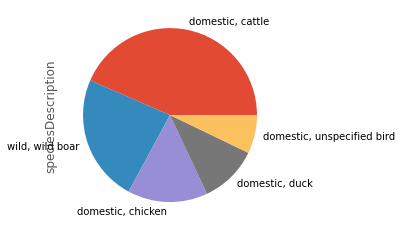

In [11]:
df['speciesDescription'].value_counts().sort_values(ascending=False).head(5).plot(kind='pie')

In [18]:
cattle = df[df['speciesDescription'] == 'domestic, cattle']

In [20]:
cattle['region'].value_counts()

Europe      4573
Africa       228
Asia          91
Americas      21
Name: region, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
count    4799.000000
mean        0.406543
std         6.834918
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       435.000000
Name: sumDeaths, dtype: float64


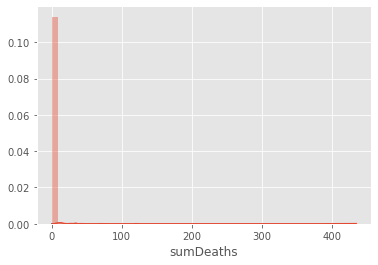

In [25]:
print(sns.distplot(cattle['sumDeaths'], kde=True))
print(cattle['sumDeaths'].describe())

<AxesSubplot:xlabel='sumDestroyed', ylabel='sumDeaths'>

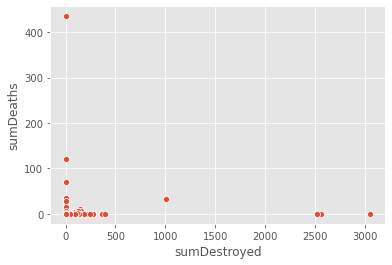

In [28]:
sns.scatterplot('sumDestroyed', 'sumDeaths', data=cattle)

In [48]:
cattle['sumDestroyed'].sort_values(ascending=False)

12322    3052.0
16806    2565.0
16811    2518.0
16807    2518.0
1122     1003.0
          ...  
15265       NaN
15266       NaN
15267       NaN
16015       NaN
16463       NaN
Name: sumDestroyed, Length: 4913, dtype: float64

In [51]:
outliers_cattle = cattle[cattle['sumDestroyed'] >= 1003]

In [52]:
outliers_cattle['sumDestroyed'].value_counts()

2518.0    2
1003.0    2
2565.0    1
3052.0    1
Name: sumDestroyed, dtype: int64

In [53]:
outliers_cattle = outliers_cattle[['sumCases', 'sumDestroyed']]

<AxesSubplot:xlabel='sumCases', ylabel='sumDestroyed'>

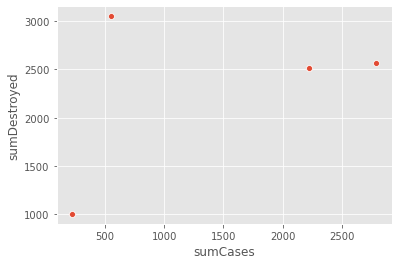

In [57]:
#It doesn't look like there is any relationship between the number of cattle killed and the numer of cases
sns.scatterplot('sumCases', 'sumDestroyed', data=outliers_cattle)

In [60]:
##Cattle are the main mammal reservoir for Bluetongue disease and it is only transmitted by insect vectors
cattle['disease'].value_counts()

Bluetongue                           2507
Lumpy skin disease                   2111
Foot and mouth disease                239
Anthrax                                33
Bovine spongiform encephalopathy        6
Contagious bovine pleuropneumonia       4
Rift Valley fever                       4
Rabies                                  4
Bovine tuberculosis                     2
Brucellosis (Brucella abortus)          1
West Nile Fever                         1
Brucellosis (Brucella suis)             1
Name: disease, dtype: int64

# What region/country is most at risk according to this data?

# I don't know how much I trust this data. I know Africa does not have a good disease surveillance infrastructure.

In [61]:
df['country'].value_counts().index[0]

'France'

<AxesSubplot:>

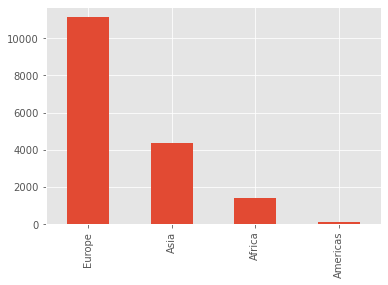

In [62]:
#We also need to consider where the disease came from and where patient zero came from
df['region'].value_counts().sort_values(ascending=False).head(5).plot(kind='bar')

# We will focus on Africa.  Zoonotic diseases still account for many of the health problems in Africa, there has been a re-emergence of Malaria and Yellow Fever in the past 15 years, a spread of HPAI and H5N1 in poultry farms throughout Nigeria and other west African countries.  Most African countries are not prepared to respond to outbreaks.

In [63]:
from arcgis.gis import GIS
gis = GIS()
map1 = gis.map('Africa',5, '3D')
map1

MapView(layout=Layout(height='400px', width='100%'), mode='3D', zoom=5.0)

In [262]:
#Filtering out the dataframe to get back only cases in Africa
Africa_df = df[df['region'] == 'Africa']

In [263]:
Africa_df.head()

,Id,source,latitude,longitude,region,country,admin1,localityName,localityQuality,observationDate,reportingDate,status,disease,serotypes,speciesDescription,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansGenderDesc,humansAge,humansAffected,humansDeaths
0,230399,OIE,-27.90000,30.80000,Africa,South Africa,KwaZulu-Natal,HPAI_H5N8_2017_019,Exact,17/08/2017,22/08/2017,Confirmed,Influenza - Avian,H5N8 HPAI,"domestic, unspecified bird",248000.0,12.0,12.0,50000.0,0.0,NaN,0.0,NaN,NaN
2,230333,OIE,-21.07774,30.21162,Africa,Zimbabwe,Masvingo,Mwambe,Exact,16/08/2017,16/08/2017,Confirmed,Foot and mouth disease,NaN,"domestic, cattle",1283.0,112.0,0.0,NaN,7.0,NaN,NaN,NaN,NaN
3,230396,OIE,-26.00000,28.30000,Africa,South Africa,Gauteng,HPAI_H5N8_2017_020,Exact,15/08/2017,22/08/2017,Confirmed,Influenza - Avian,H5N8 HPAI,"wild, unspecified bird",NaN,1.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN
6,230395,OIE,-26.00000,28.30000,Africa,South Africa,Gauteng,HPAI_H5N8_2017_021,Exact,14/08/2017,22/08/2017,Confirmed,Influenza - Avian,H5N8 HPAI,"domestic, goose",34.0,19.0,19.0,0.0,0.0,NaN,0.0,NaN,NaN
9,230394,OIE,-24.60000,27.20000,Africa,South Africa,Limpopo,HPAI_H5N8_2017_022,Exact,12/08/2017,22/08/2017,Confirmed,Influenza - Avian,H5N8 HPAI,"domestic, unspecified bird",62.0,5.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN


In [264]:
#Checking for redundancies
comparisons = df[['localityName', 'disease', 'localityQuality']]

In [265]:
#I think locality name is just what the locals call the disease and I don't think locality quality will have any 
#influence on our model
comparisons.head()

,localityName,disease,localityQuality
0,HPAI_H5N8_2017_019,Influenza - Avian,Exact
1,Novaya Stanica,African swine fever,Exact
2,Mwambe,Foot and mouth disease,Exact
3,HPAI_H5N8_2017_020,Influenza - Avian,Exact
4,Hvozdná,African swine fever,Exact


In [266]:
Death_table = df[['sumDestroyed', 'sumSlaughtered', 'sumDeaths', 'sumCases']]

In [267]:
#There is some correlation to the total deaths but not much except between cases and deaths
#I think sumDestroyed and sumSlaughtered are the amount of wildlife and livestock killed that were infected
Death_table.corr(method='pearson')

,sumDestroyed,sumSlaughtered,sumDeaths,sumCases
sumDestroyed,1.000000,-0.002761,0.156072,0.173311
sumSlaughtered,-0.002761,1.000000,0.017402,0.010994
sumDeaths,0.156072,0.017402,1.000000,0.706913
sumCases,0.173311,0.010994,0.706913,1.000000


# 2. Feature engineering

In [268]:
#Creating a column for the number of days between the observation of symptoms and the date reporting using 
#the two existing features
Africa_df['reportingDate'] = pd.to_datetime(Africa_df['reportingDate'])

In [269]:
Africa_df['reported_day'] = Africa_df['reportingDate'].dt.day

In [270]:
Africa_df['reported_day'].astype('int64')

0        22
2        16
3        22
6        22
9        22
         ..
17003    18
17004    18
17005    18
17006    18
17007    18
Name: reported_day, Length: 1414, dtype: int64

In [271]:
Africa_df['reported_day'].dtype

dtype('int64')

In [272]:
Africa_df['reported_day'].isnull().sum()

0

In [273]:
Africa_df['observationDate'] = pd.to_datetime(Africa_df['observationDate'])

In [274]:
Africa_df['observationDate'].isnull().sum()

12

In [275]:
#The observation date could be when the patient first starting feeling sick and seeing symptoms
Africa_df['observationDate'].value_counts().index[0]

Timestamp('2017-06-04 00:00:00')

In [276]:
Africa_df['observationDate'].fillna('2017-06-04 00:00:00', inplace=True)

In [277]:
Africa_df['observationDate'] = pd.to_datetime(Africa_df['observationDate'])

In [278]:
Africa_df['obs_day'] = Africa_df['observationDate'].dt.day

In [279]:
#Filling all null values with the most common value
Africa_df['obs_day'].value_counts().index[0]

2

In [280]:
Africa_df['obs_day'].fillna(2, inplace=True)

In [281]:
Africa_df['obs_day'] = Africa_df['obs_day'].astype('int64')

In [282]:
Africa_df['obs_day'].value_counts()

2     93
1     86
3     80
8     74
4     73
23    65
20    59
24    57
6     55
21    49
9     48
7     45
30    42
14    41
31    41
22    41
15    40
18    39
17    37
27    37
10    33
5     33
16    31
25    30
26    30
28    30
29    29
13    28
11    26
19    24
12    18
Name: obs_day, dtype: int64

In [283]:
#The days between the first observation of symptoms and reported case
#I think the longer someone waits to treat the disease, the less likely they are to recover
#I had to use abs() to get the absolute values so there weren't any negatives

Africa_df['Days_since_obs'] = abs(Africa_df['reported_day'] - Africa_df['obs_day'])

In [284]:
Africa_df['Days_since_obs'].astype(int)

0         5
2         0
3         7
6         8
9        14
         ..
17003    12
17004    17
17005     6
17006     9
17007     2
Name: Days_since_obs, Length: 1414, dtype: int32

In [285]:
reported_vs_death_count = Africa_df[['Days_since_obs', 'sumDeaths']]

In [286]:
Africa_df['disease'].value_counts()

Influenza - Avian                    998
Foot and mouth disease               174
Rift Valley fever                     50
Lumpy skin disease                    48
Newcastle disease                     36
African swine fever                   35
Peste des petits ruminants            26
Anthrax                               13
African horse sickness                12
Bluetongue                            10
Contagious bovine pleuropneumonia      4
Sheep pox and goat pox                 4
Brucellosis (Brucella abortus)         2
West Nile Fever                        1
Rabies                                 1
Name: disease, dtype: int64

In [287]:
#The average number of deaths is 595 - 596
#The average deaths per year is 365 per 1,000 adults and these numbers only account for deaths from zoonotic diseases
#It might be helpful to have two additional columns: the total populationof where the disease came from and those in that 
#population who got sick
reported_vs_death_count['sumDeaths'].mean()

595.5150862068965

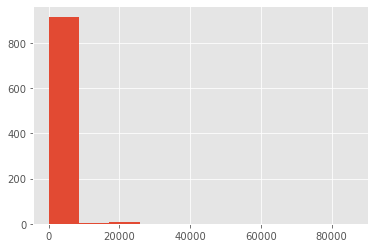

In [288]:
reported_vs_death_count['sumDeaths'].hist();

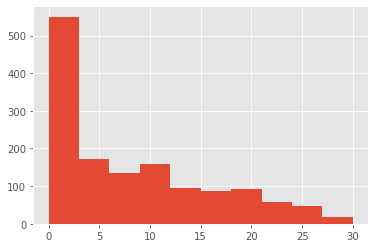

In [289]:
#On average it is between 0 and 5 days
reported_vs_death_count['Days_since_obs'].hist();

In [290]:
Africa_df['Days_since_obs'].isnull().sum()

0

In [291]:
#The percentage of the population at risk who got sick
Africa_df['porportion_of_cases_to_at_risk_pop'] = Africa_df['sumCases'] / Africa_df['sumAtRisk']

In [292]:
Africa_df['porportion_of_cases_to_at_risk_pop'].value_counts().index[0]

1.0

In [293]:
Africa_df['porportion_of_cases_to_at_risk_pop'].fillna(1.0, inplace=True)

In [294]:
Africa_df['porportion_of_cases_to_at_risk_pop'].astype('int64')

0        0
2        0
3        1
6        0
9        0
        ..
17003    1
17004    1
17005    1
17006    1
17007    1
Name: porportion_of_cases_to_at_risk_pop, Length: 1414, dtype: int64

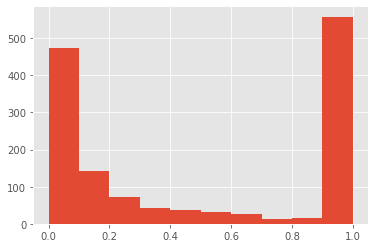

In [295]:
#Maybe the poportion of those who got sick to those at risk came from small populations which would explain the high bar around
#0 - 0.1 and maybe the numbers on the other end between 0.7 and 0.9 came from large populations
#The spike at one is because I filled all the null values with 1
Africa_df['porportion_of_cases_to_at_risk_pop'].hist();

<AxesSubplot:ylabel='Density'>

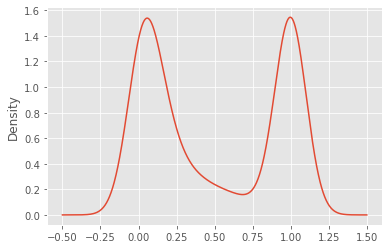

In [296]:
Africa_df['porportion_of_cases_to_at_risk_pop'].plot(kind='kde')

# Does the difference between the reported date and the reported date have any relationship to total deaths and can the sum at risk be used to predict cases?

In [297]:
#Days since observations and the porportion of cases to those at risk
#does have a stronger relation to the sum of deaths than sum of cases
cases = Africa_df[['Days_since_obs', 'porportion_of_cases_to_at_risk_pop', 'sumCases', 'sumDeaths']]

In [298]:
cases.corr()

,Days_since_obs,porportion_of_cases_to_at_risk_pop,sumCases,sumDeaths
Days_since_obs,1.000000,-0.272359,0.011435,0.020488
porportion_of_cases_to_at_risk_pop,-0.272359,1.000000,0.092315,0.148940
sumCases,0.011435,0.092315,1.000000,0.997713
sumDeaths,0.020488,0.148940,0.997713,1.000000


In [299]:
#Re-checking the statistics after new columns are added
Africa_df.describe()

,Id,latitude,longitude,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansAge,humansAffected,humansDeaths,reported_day,obs_day,Days_since_obs,porportion_of_cases_to_at_risk_pop
count,1414.000000,1414.000000,1414.000000,9.050000e+02,1316.000000,928.000000,1274.000000,862.000000,81.000000,54.000000,25.0,1414.000000,1414.000000,1414.000000,1414.000000
mean,216268.871287,7.970578,18.724179,8.504718e+03,654.945289,595.515086,2319.010204,55.639211,1.271605,1.037037,1.0,15.245403,14.148515,7.727723,0.493572
std,7763.778481,20.205204,13.099893,7.236161e+04,3627.264136,3744.975256,13942.246019,1074.989782,6.644570,0.272166,0.0,8.869497,9.482088,7.735735,0.437996
min,206375.000000,-34.300000,-23.645005,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000
25%,209840.250000,-3.223400,8.228594,1.800000e+02,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,7.000000,5.000000,1.000000,0.050000
50%,213763.500000,10.017470,21.850000,9.200000e+02,29.000000,20.000000,16.000000,0.000000,0.000000,1.000000,1.0,16.000000,14.000000,5.000000,0.333153
75%,223787.750000,27.900371,31.033991,2.541000e+03,150.500000,181.000000,677.500000,0.000000,0.000000,1.000000,1.0,22.000000,23.000000,13.000000,1.000000
max,230399.000000,37.172730,63.416667,2.000000e+06,86000.000000,86000.000000,325789.000000,30500.000000,48.000000,3.000000,1.0,31.000000,31.000000,30.000000,1.000000


In [300]:
Africa_df.drop(['Id', 'longitude', 'latitude','humansAge', 'humansAffected', 'humansDeaths',
               'source', 'admin1', 'localityName', 'localityQuality',
               'status', 'serotypes', 'humansGenderDesc'], axis=1, inplace=True)

In [301]:
#checking column names and shape of the dataframe after dropping features
Africa_df.columns

Index(['region', 'country', 'observationDate', 'reportingDate', 'disease',
       'speciesDescription', 'sumAtRisk', 'sumCases', 'sumDeaths',
       'sumDestroyed', 'sumSlaughtered', 'reported_day', 'obs_day',
       'Days_since_obs', 'porportion_of_cases_to_at_risk_pop'],
      dtype='object')

In [302]:
Africa_df.shape

(1414, 15)

In [303]:
#Let's take care of all null values
Africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 0 to 17007
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   region                              1414 non-null   object        
 1   country                             1414 non-null   object        
 2   observationDate                     1414 non-null   datetime64[ns]
 3   reportingDate                       1414 non-null   datetime64[ns]
 4   disease                             1414 non-null   object        
 5   speciesDescription                  1360 non-null   object        
 6   sumAtRisk                           905 non-null    float64       
 7   sumCases                            1316 non-null   float64       
 8   sumDeaths                           928 non-null    float64       
 9   sumDestroyed                        1274 non-null   float64       
 10  sumSlaughtered         

In [304]:
#Using the most common species to fill speciesDescription
Africa_df['speciesDescription'].value_counts().index[0]       

'domestic, chicken'

In [305]:
Africa_df['speciesDescription'].fillna('domestic, chicken', inplace=True)

In [306]:
#Using the median value to fill all the numeric null values
Africa_df.dropna(inplace=True)

In [307]:
Africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 16889
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   region                              833 non-null    object        
 1   country                             833 non-null    object        
 2   observationDate                     833 non-null    datetime64[ns]
 3   reportingDate                       833 non-null    datetime64[ns]
 4   disease                             833 non-null    object        
 5   speciesDescription                  833 non-null    object        
 6   sumAtRisk                           833 non-null    float64       
 7   sumCases                            833 non-null    float64       
 8   sumDeaths                           833 non-null    float64       
 9   sumDestroyed                        833 non-null    float64       
 10  sumSlaughtered          

In [308]:
#factorize all object datatypes machine learning algorithms
#Pd.factorize() - obtains numerical representation
Africa_df['region'] = pd.factorize(Africa_df['region'])[0]
Africa_df['country'] = pd.factorize(Africa_df['country'])[0]
Africa_df['disease'] = pd.factorize(Africa_df['disease'])[0]
Africa_df['speciesDescription'] = pd.factorize(Africa_df['speciesDescription'])[0]

In [309]:
Africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 16889
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   region                              833 non-null    int64         
 1   country                             833 non-null    int64         
 2   observationDate                     833 non-null    datetime64[ns]
 3   reportingDate                       833 non-null    datetime64[ns]
 4   disease                             833 non-null    int64         
 5   speciesDescription                  833 non-null    int64         
 6   sumAtRisk                           833 non-null    float64       
 7   sumCases                            833 non-null    float64       
 8   sumDeaths                           833 non-null    float64       
 9   sumDestroyed                        833 non-null    float64       
 10  sumSlaughtered          

In [310]:
Africa_df.head()

,region,country,observationDate,reportingDate,disease,speciesDescription,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,reported_day,obs_day,Days_since_obs,porportion_of_cases_to_at_risk_pop
0,0,0,2017-08-17,2017-08-22,0,0,248000.0,12.0,12.0,50000.0,0.0,22,17,5,0.000048
6,0,0,2017-08-14,2017-08-22,0,1,34.0,19.0,19.0,0.0,0.0,22,14,8,0.558824
9,0,0,2017-12-08,2017-08-22,0,0,62.0,5.0,5.0,0.0,0.0,22,8,14,0.080645
13,0,0,2017-11-08,2017-08-22,0,0,266.0,81.0,81.0,135.0,0.0,22,8,14,0.304511
24,0,0,2017-09-08,2017-11-08,0,2,1071.0,22.0,0.0,0.0,0.0,8,8,0,0.020542


In [311]:
##I dropped sum of cases because even though it's highly correlated with sum of deaths, I want my model to be able to predict 
#the amount of deaths even before there are cases
Africa_df = Africa_df.drop(['country', 'observationDate', 'reportingDate', 'sumCases','reported_day',
                           'obs_day'],axis=1)

In [312]:
Africa_df.corr()['sumDeaths']

region                                     NaN
disease                              -0.074806
speciesDescription                   -0.030480
sumAtRisk                             0.167127
sumDeaths                             1.000000
sumDestroyed                          0.171545
sumSlaughtered                        0.062930
Days_since_obs                        0.021603
porportion_of_cases_to_at_risk_pop    0.176595
Name: sumDeaths, dtype: float64

In [313]:
Africa_df.dtypes

region                                  int64
disease                                 int64
speciesDescription                      int64
sumAtRisk                             float64
sumDeaths                             float64
sumDestroyed                          float64
sumSlaughtered                        float64
Days_since_obs                          int64
porportion_of_cases_to_at_risk_pop    float64
dtype: object

In [314]:
X = Africa_df.drop('sumDeaths', axis=1)
y= Africa_df.sumDeaths

In [415]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [416]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [417]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True)
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [418]:
#Removing the balnced class parameter, the accuracy went from .053 to .347
#Lasso(l1) score went from .341 to .347
#Setting the l1_ratio to .5, the score went from .347 to .353

from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(penalty='elasticnet', random_state=0, solver='saga', l1_ratio=.5)

In [419]:
logR.fit(X_train,y_train)
predictions = logR.predict(X_test)

In [420]:
logR.score(X_test, y_test)

0.3532934131736527

In [473]:
#Changing the number of neighbors from 5 to 7, the score went from .347 to .359
#Uniform - all points in each neighborhood are weighted equally

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [474]:
test_preds = clf.predict(X_test)

In [475]:
clf.score(X_test,y_test)

0.3592814371257485

# 5. More EDA on cites dataset

# Comparisons of wildlife exports and disease outbreaks

In [480]:
cites = pd.read_csv('comptab_2018-01-29 16_00_comma_separated.csv')
cites.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,feathers,NaN,S,W
3,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,specimens,NaN,S,W
4,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,DK,IS,NaN,700.0,NaN,specimens,NaN,S,W


In [481]:
#Focusing on 2016 when there were spikes of cases
cites['Year'].value_counts()

2016    67007
2017      154
Name: Year, dtype: int64

In [482]:
cites2 = cites[cites['Year'] == 2016]

In [483]:
#ID -Indonesia
#XX - Unknown
#US - United States of America
#VN - Vietnam
#ZW - Zimbabwe
cites2['Origin'].value_counts()

ID    2968
XX    2426
US    2400
VN    1703
ZW    1212
      ... 
MV       1
EE       1
CK       1
MT       1
DM       1
Name: Origin, Length: 179, dtype: int64

In [484]:
#Filtering dataset to extract the top 5 origin countries for the species traded
countries_of_interest = cites2[(cites2['Origin'] == 'ID') | (cites2['Origin'] == 'XX') | (cites2['Origin'] == 'US') |
                                (cites2['Origin'] == 'VN') | (cites2['Origin'] == 'ZW')]


In [485]:
countries_of_interest.describe()

,Year,Importer reported quantity,Exporter reported quantity
count,10709.0,4717.000000,7467.000000
mean,2016.0,935.852932,1109.171058
std,0.0,9976.771544,15242.402989
min,2016.0,0.001000,0.000030
25%,2016.0,2.000000,2.000000
50%,2016.0,7.000000,6.000000
75%,2016.0,56.000000,42.000000
max,2016.0,373740.000000,660355.200000


In [486]:
#Indonesia is The top country of origin for species traded
countries_of_interest['Origin'].value_counts()

ID    2968
XX    2426
US    2400
VN    1703
ZW    1212
Name: Origin, dtype: int64

In [487]:
#I will have to do some more research on Indonesia and the species that live there, their value for being traded, and the 
#diseases they are known to carry
from arcgis.gis import GIS
gis = GIS()
map2 = gis.map('Indonesia',5, '3D')
map2

MapView(layout=Layout(height='400px', width='100%'), mode='3D', zoom=5.0)

In [488]:
# Elephantidae spp. - Asian elephant
# Loxodonta africana - African bush elephant
# Macaca fascicularis - Long-tailed macaque
# Varanus salvator - Asian water monitor 
# Python bivittatus - Burmese python
#Crocodylus porosus - Saltwater crocodile
countries_of_interest['Taxon'].value_counts().head(10)

Alligator mississippiensis    1768
Python reticulatus            1570
Crocodylus niloticus          1128
Python bivittatus              747
Varanus salvator               608
Loxodonta africana             347
Python brongersmai             322
Elephantidae spp.              222
Macaca fascicularis            174
Crocodylus porosus             159
Name: Taxon, dtype: int64

# As stated above in the introduction, the goal of this project was to highlight the importance of a global disease surveillance system and having qualified, trained people contributing to it.  There are many factors that have led to the increase in emergence of zoonotic diseases. Human travel and increased mobility, changes in human eating patterns and culture, and rapid shipments of livestock.  This need for better anti-poaching measures should also be considered as a tool to control the spread of zoonotic diseases.

# 1. EDA of EMPRES Global Animal Disease Surveillance dataset

# 2. Feature engineering

# 3. Logistic Regression

# 4. K-Nearest Neighbors

# 5. EDA of CITES dataset
